# Predicting the Impact of Air Quality on Human Health


## 1. INTRODUCTION

### Business Understanding
In the context of increasingly deteriorating air quality globally, understanding its impact on human health has become a critical concern for both public health authorities and individuals. Accurate predictions of how varying levels of air pollution affect health outcomes are essential for informing policy decisions, public health strategies, and individual behaviors.

### Objective of the Analysis

The primary objective of this analysis is to develop a predictive model that classifies the impact of air quality on human health into distinct categories. This model aims to provide actionable insights that support effective decision-making, policy formulation, and public awareness efforts. By leveraging air quality data and advanced machine learning techniques, the project seeks to contribute to a better understanding of the relationship between air pollution and health outcomes, ultimately fostering improved health protection strategies and practices.

### Data Understanding
In this project, the focus is on analyzing and predicting the impact of air quality on human health using a dataset from Kaggle that includes various environmental and meteorological variables.

## 2. Load and Explore Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
data_path = '/content/drive/My Drive/air-quality-respiratory-impact-project/air_quality_health_impact_data.csv'
air_df=  pd.read_csv(data_path)

In [4]:
# Display basic imformation about the dataset
air_df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [5]:
air_df.shape

(5811, 15)

In [6]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [7]:
# Check for duplicates
air_df.duplicated().sum()

0

In [8]:
# Handle missing values (if any)
air_df.isnull().sum()

,0
RecordID,0
AQI,0
PM10,0
PM2_5,0
NO2,0
SO2,0
O3,0
Temperature,0
Humidity,0
WindSpeed,0


## 3. Exploratory Data Analysis(EDA)

In [9]:
air_df.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


In [10]:
air_df.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

In [11]:
air_df.drop(columns=['RecordID', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions'], inplace=True)

Univariate Analysis

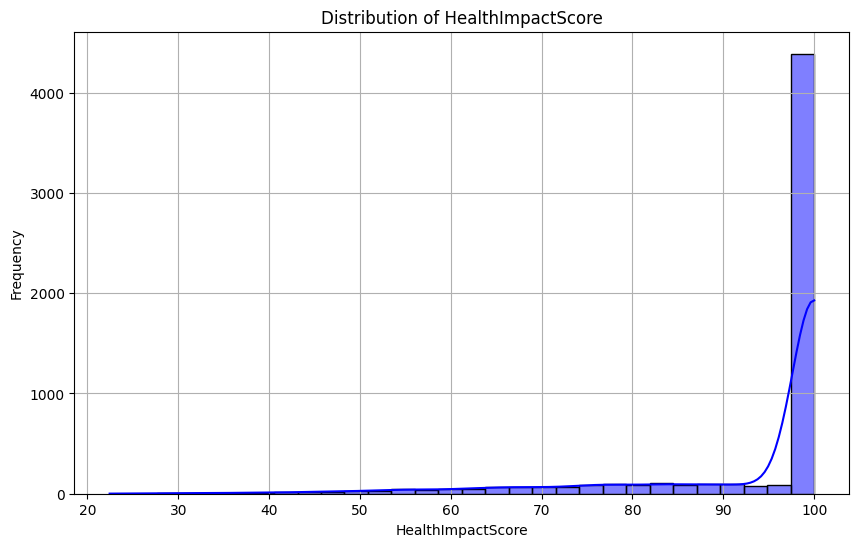

In [12]:
# Visualize the  distribution of 'HealthImpactScore'
plt.figure(figsize=(10, 6))

sns.histplot(air_df['HealthImpactScore'], bins=30, kde=True, color='blue')
plt.title('Distribution of HealthImpactScore')
plt.xlabel('HealthImpactScore')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
# Define the classes

#HealthImpactScore: A score indicating the overall health impact based on air quality and other related factors, ranging from 0 to 100.
# HealthImpactClass: Classification of the health impact based on the health impact score:
# 0: 'Very High' (HealthImpactScore >= 80)
# 1: 'High' (60 <= HealthImpactScore < 80)
# 2: 'Moderate' (40 <= HealthImpactScore < 60)
# 3: 'Low' (20 <= HealthImpactScore < 40)
# 4: 'Very Low' (HealthImpactScore < 20)

def classify_health_impact(impact_class):
  if impact_class==0:
    return 'Very High'
  elif impact_class==1:
    return 'High'
  elif impact_class==2:
    return 'Moderate'
  elif impact_class==3:
    return 'Low'
  else :
    return 'Very Low'

# Apply the classification
air_df['HealthImpactClass_Label'] = air_df['HealthImpactClass'].apply(classify_health_impact)


air_df[['HealthImpactClass','HealthImpactClass_Label']].head()



,HealthImpactClass,HealthImpactClass_Label
0,0.0,Very High
1,0.0,Very High
2,0.0,Very High
3,0.0,Very High
4,0.0,Very High


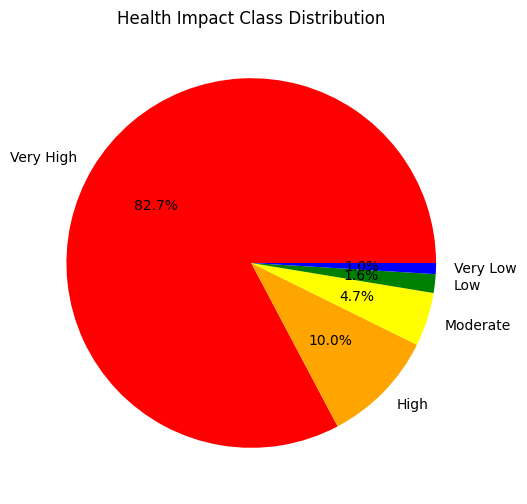

In [14]:
# Visualize the class distribution
labels = ['Very High', 'High', 'Moderate', 'Low', 'Very Low']
colors = ['red', 'orange', 'yellow', 'green', 'blue']
data = air_df['HealthImpactClass_Label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Health Impact Class Distribution')
plt.show()


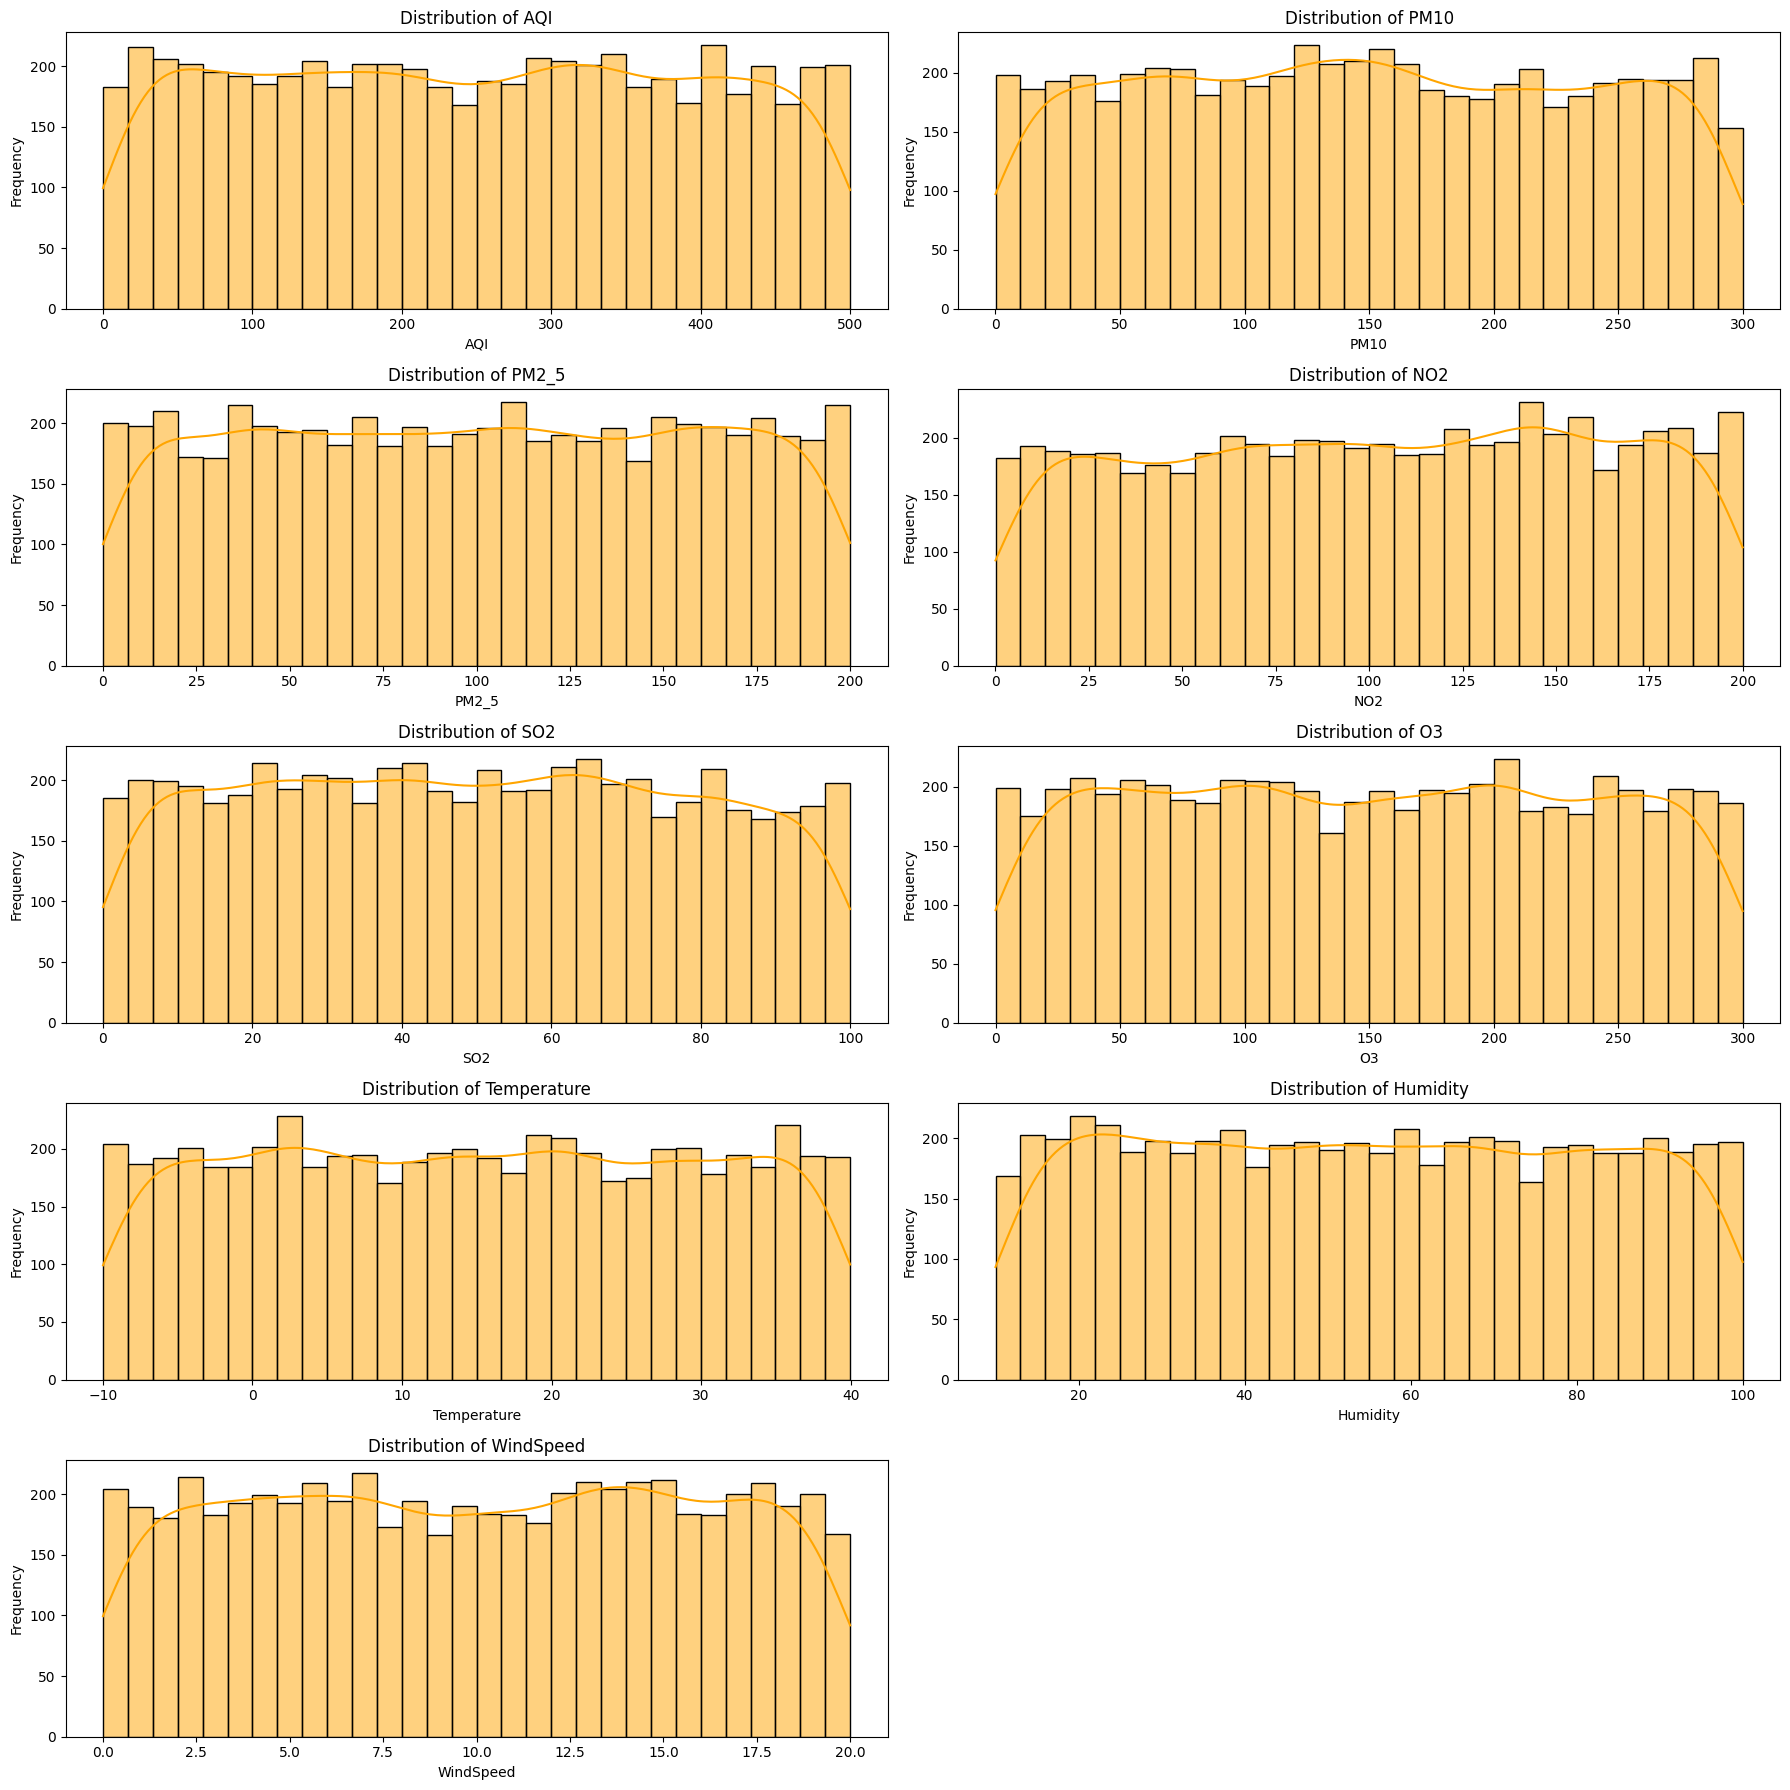

In [15]:
# Visualize distribution of each air quality indicator
Indicators= ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3','Temperature','Humidity', 'WindSpeed' ]

plt.figure(figsize=(18, 18))

for i, Indicator in enumerate(Indicators, 1):
    plt.subplot(5, 2, i)
    sns.histplot(air_df[Indicator], bins=30, kde=True, color= 'orange')
    plt.title(f'Distribution of {Indicator}')
    plt.xlabel(Indicator)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Bivariate Analysis

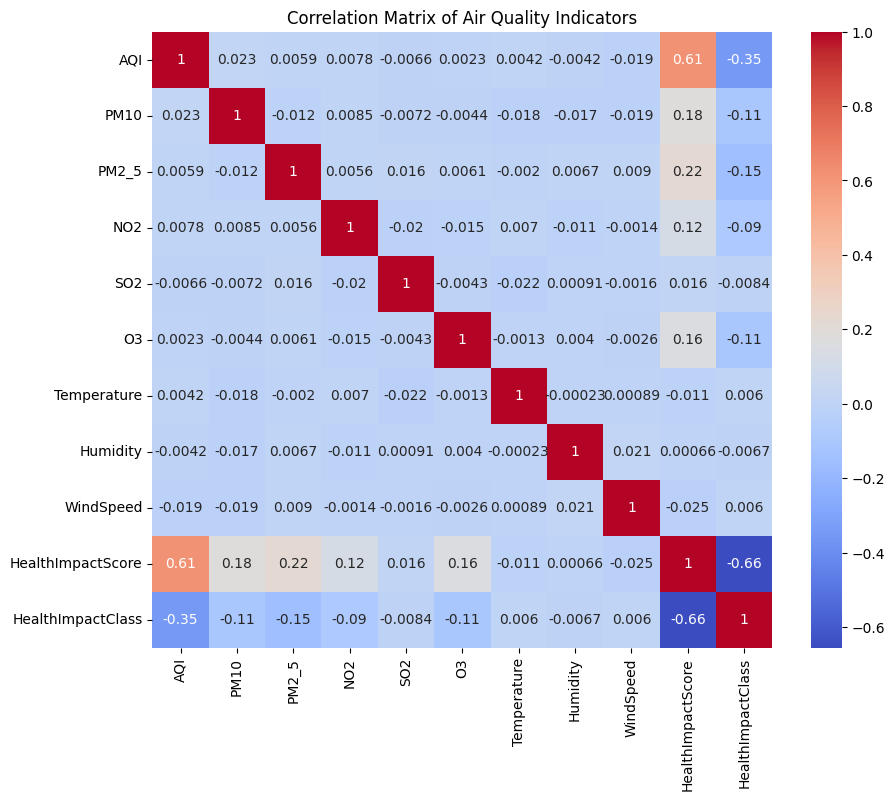

In [16]:
# Visualize correlation with HealthImpactClass
correlation_matrix = air_df.drop(columns=['HealthImpactClass_Label']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Air Quality Indicators')
plt.show()


**Inferences:**

Strong Relationship with AQI: The correlation analysis highlights that AQI is a significant factor in determining health impact, aligning with general expectations that poor air quality is detrimental to health.

Particulate Matter: PM2.5 and PM10 are also important contributors to health impact, though they do not have as strong a correlation as AQI.

Weaker Correlations for Other Factors: The weaker correlations for NO2, SO2, O3, and meteorological variables suggest that these factors might not independently drive health impacts as much as AQI and particulate matter do. However, their combined effect could still be significant.

Overall Impact on Health: The negative correlations with Health Impact Class indicate that as pollutant levels increase, health outcomes worsen, which aligns with the model's objective of predicting health impacts based on environmental data.



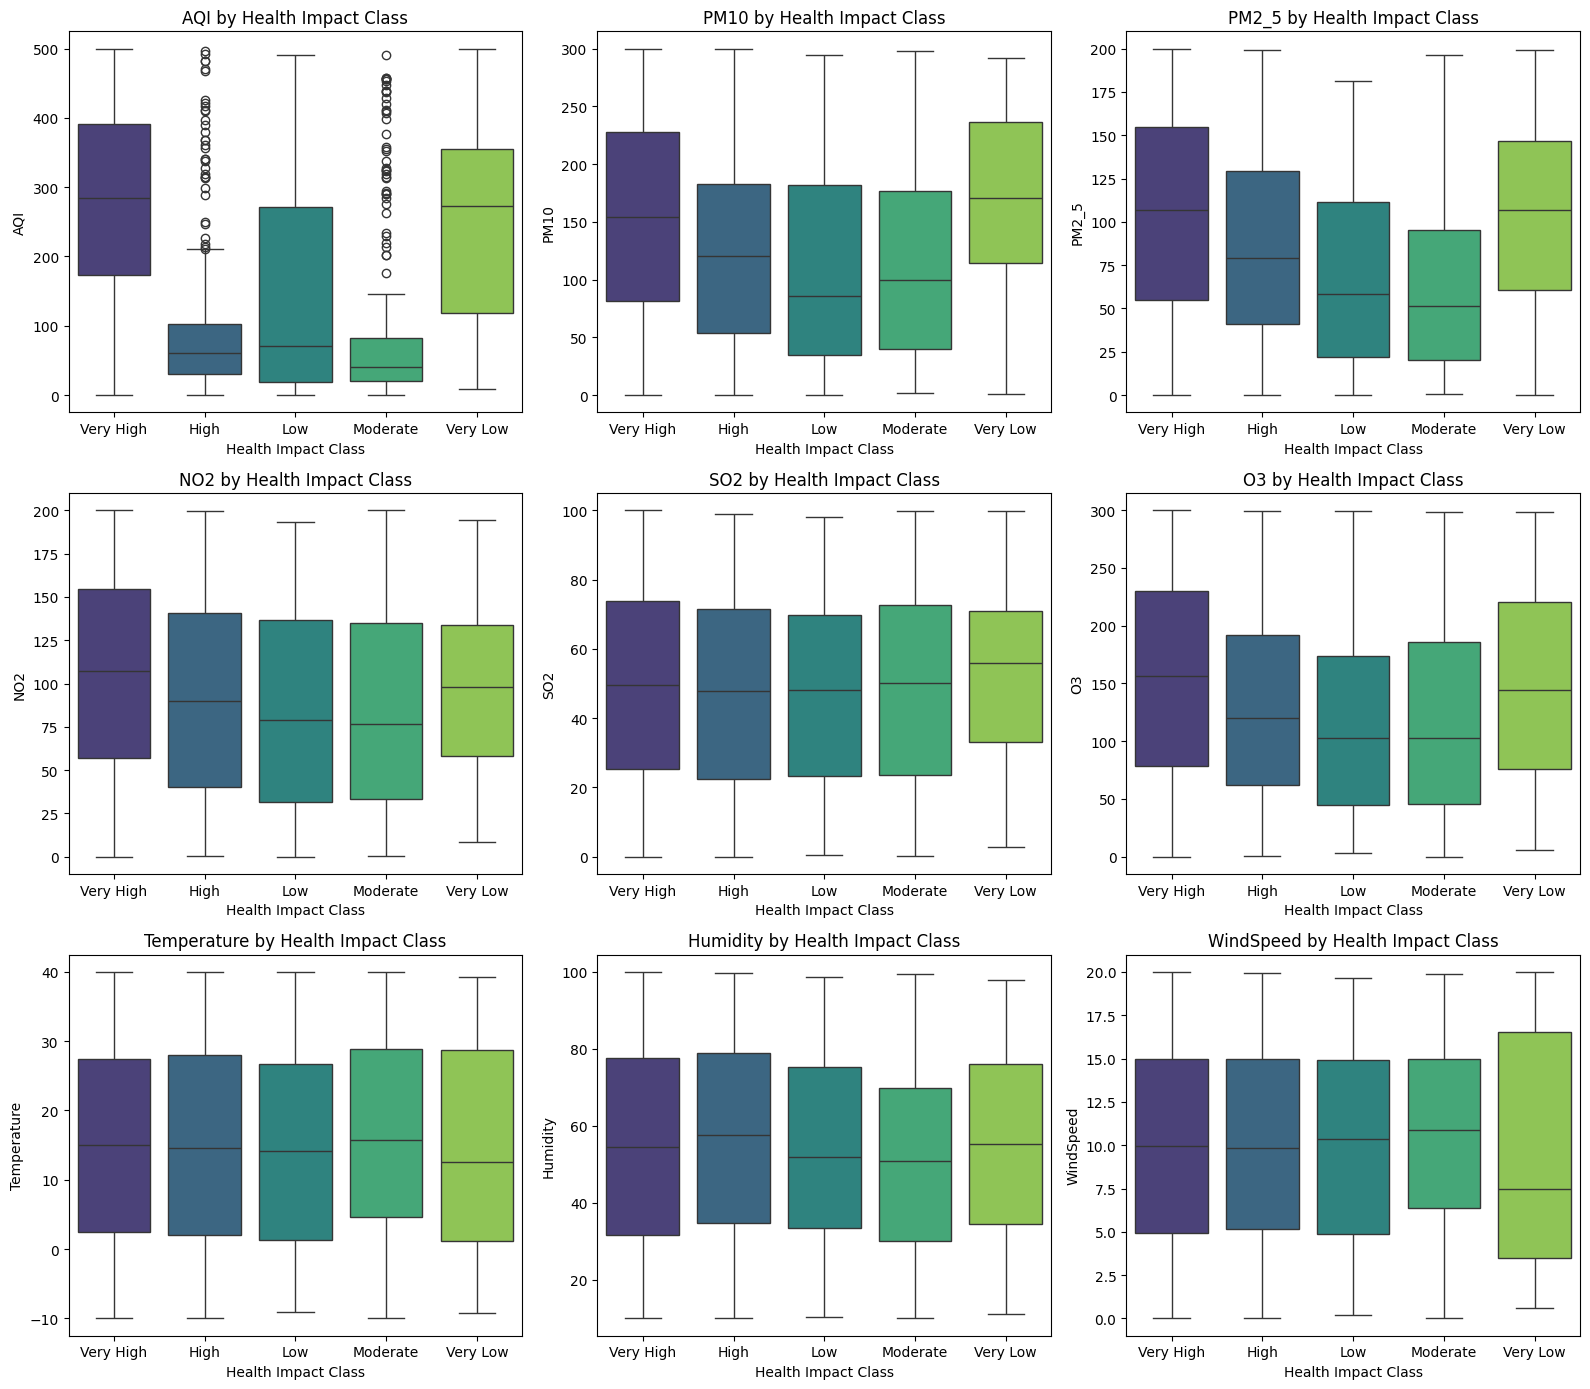

In [17]:
# Visualize distribution of indicators by class
Indicators= ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3','Temperature','Humidity', 'WindSpeed' ]

plt.figure(figsize=(16, 14))

for i, Indicator in enumerate(Indicators, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='HealthImpactClass_Label', y=Indicator, data=air_df, palette='viridis')
    plt.title(f'{Indicator} by Health Impact Class')
    plt.xlabel('Health Impact Class')
    plt.ylabel(Indicator)

plt.tight_layout()
plt.show()


Higher levels of pollutants like PM2.5, PM10, NO2, and O3 are linked to more severe health impacts, especially in the 'high' and 'very high' categories. These pollutants show significant variation across classes, highlighting their role in serious health issues. Other factors like SO2, temperature, humidity, and wind speed have a more uniform effect on health outcomes.

## 4. Data Preprocessing

4.1 Data Splitting

In [18]:
# Separate features and target
X = air_df.drop(columns=['HealthImpactScore', 'HealthImpactClass', 'HealthImpactClass_Label'])
y = air_df['HealthImpactClass']

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
X_train.shape, y_train.shape

((4648, 9), (4648,))

In [21]:
X_test.shape, y_test.shape

((1163, 9), (1163,))

4.2 Feature Scaling

In [22]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


4.3 Handling Class Imbalance

In [23]:
# Check the class distribution before applying SMOTE
print(f"Class distribution before SMOTE: {Counter(y_train)}")

Class distribution before SMOTE: Counter({0.0: 3855, 1.0: 455, 2.0: 220, 3.0: 75, 4.0: 43})


In [24]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [25]:
# Check the class distribution after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_train_res)}")

Class distribution after SMOTE: Counter({0.0: 3855, 1.0: 3855, 2.0: 3855, 4.0: 3855, 3.0: 3855})


## 5. Model Development

In [26]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score

In [27]:
def evaluate_model(model, X_train_res, y_train_res, X_test_scaled, y_test):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)

    # Calculate various metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovr', average='weighted')

    # Generate classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Print the confusion matrix
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC Score'],
        model.__class__.__name__: [accuracy, f1, precision, recall, roc_auc]
    })

    # Plot ROC curves for each class
    plot_roc_curve(model, X_test_scaled, y_test)

    return metrics_df


In [28]:
def plot_roc_curve(model, X_test_scaled, y_test):
    y_pred_proba = model.predict_proba(X_test_scaled)
    n_classes = len(np.unique(y_test))

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


5.1 Logistic Regression

Logistic Regression Evaluation:

Confusion Matrix:
 [[358 138  28 157 272]
 [  5  65  23  23   8]
 [  6  12  25  10   0]
 [  2   4   6   5   3]
 [  3   5   0   2   3]]


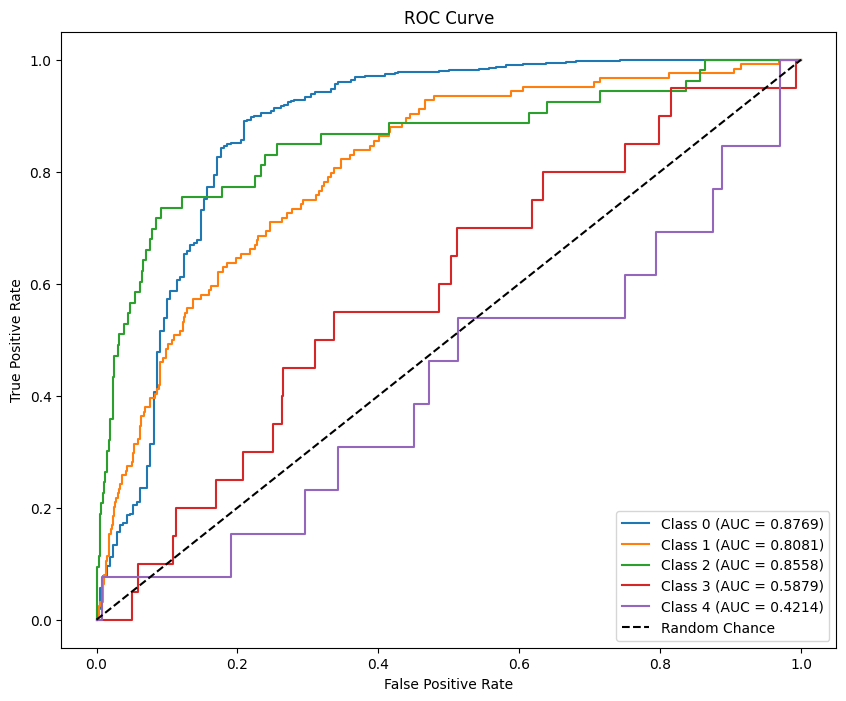

In [29]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
print("Logistic Regression Evaluation:")
logreg_metrics_df = evaluate_model(logreg, X_train_res, y_train_res, X_test_scaled, y_test)


**Logistic Regression Evaluation (Baseline Model)**

The Logistic Regression model struggles with accurate predictions, particularly for the majority class, leading to significant misclassifications across all classes.

*Accuracy:* 0.3921, performs poorly.

*F1 Score:* 0.4999, reflecting poor balance between precision and recall..

*Precision:* 0.8298, indicates that when the model predicts a class, it is often correct.

*Recall:* 0.3921, showing the model has many missed positive instances.

*ROC AUC:* 0.8585, suggesting reasonable discriminative ability, though it fails to effectively predict minority classes.

**Justification:**
Logistic Regression's high ROC AUC score contrasts with its poor accuracy and recall, making it unsuitable for this project, especially given the model's struggles with minority class predictions. This necessitates a more robust model.

5.2 Random Forest (Before Tuning)

Random Forest Evaluation:

Confusion Matrix:
 [[874  56   0  11  12]
 [ 16  94  14   0   0]
 [ 10   6  36   1   0]
 [  9   2   6   3   0]
 [  6   3   2   1   1]]


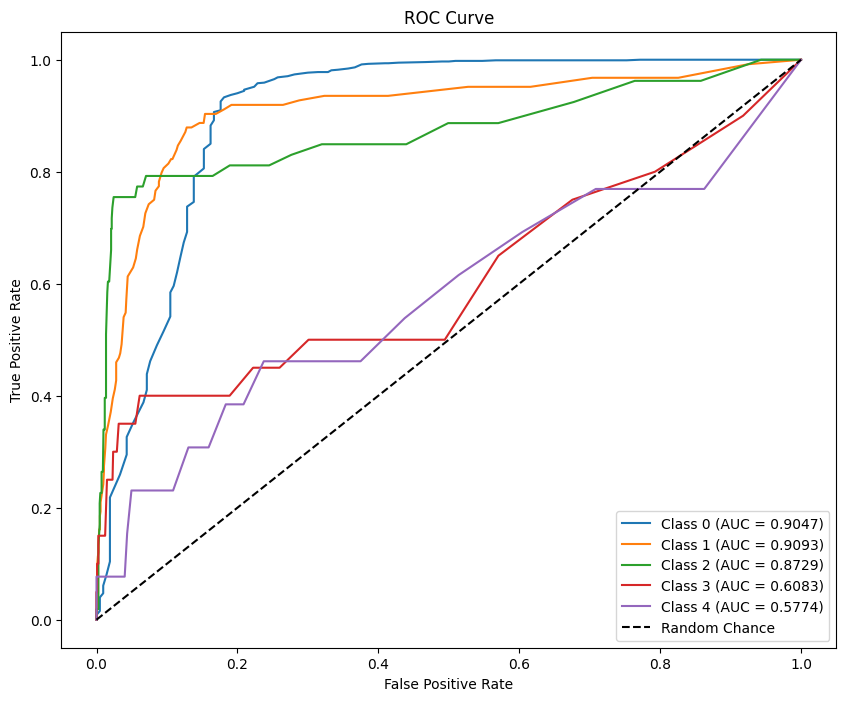

In [30]:
rf1 = RandomForestClassifier(random_state=42)
print("Random Forest Evaluation:")
rf1_metrics_df = evaluate_model(rf1, X_train_res, y_train_res, X_test_scaled, y_test)

**Random Forest Evaluation(Before Tuning)**

The Random Forest model significantly improves classification accuracy over Logistic Regression, with most samples correctly classified.

*Accuracy:* 0.8667, better than Logistic Regression.

*F1 Score:* 0.8704, indicating a better balance between precision and recall.

*Precision:* 0.8773, showing strong predictive accuracy.

*Recall:* 0.8667, reflecting effective identification of positive cases.

*ROC AUC:* 0.8950, confirming the model’s strong ability to distinguish between classes.

**Justification:**
The untuned Random Forest model provides a substantial performance improvement over Logistic Regression, especially in terms of accuracy and F1 score, while handling class imbalance effectively. Its robust discriminative power, as indicated by the ROC AUC, makes it a good candidate for this project.

5.3 Random Forest (After Tuning)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:
 {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best F1 Score:
 0.9692843980561519

Random Forest with Best Parameters Evaluation:

Confusion Matrix:
 [[870  62   0   9  12]
 [ 17  92  14   0   1]
 [ 10  12  30   1   0]
 [  9   2   4   5   0]
 [  6   3   2   1   1]]


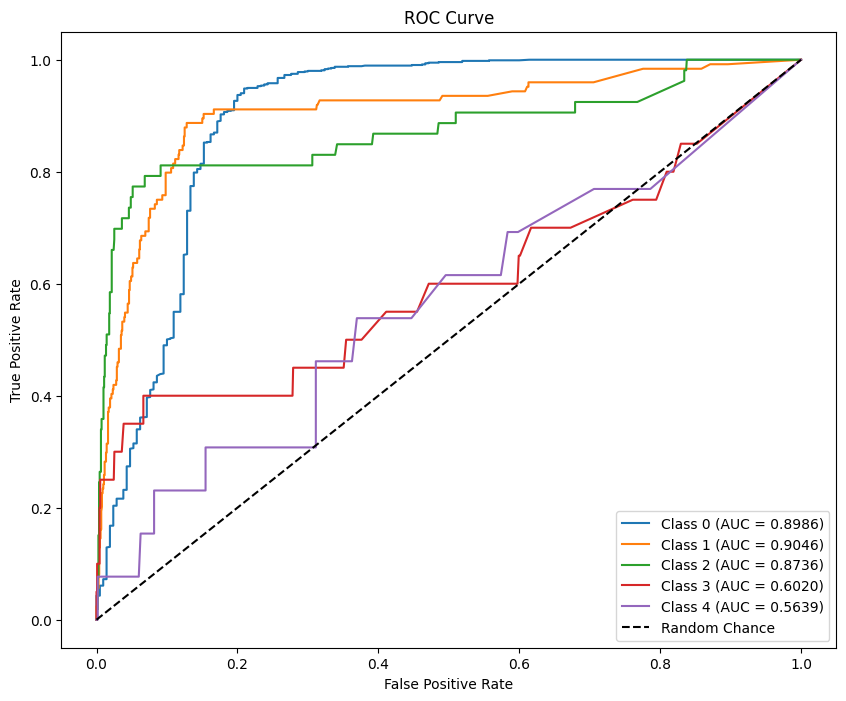

In [31]:
# Define parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],

}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize and perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train_res, y_train_res)

# Print best parameters and score
print("Best Parameters:\n", random_search.best_params_)
print("Best F1 Score:\n", random_search.best_score_)

# Get and evaluate the best Random Forest model
tuned_rf = random_search.best_estimator_


print("\nRandom Forest with Best Parameters Evaluation:")
tuned_rf_metrics_df = evaluate_model(tuned_rf, X_train_res, y_train_res, X_test_scaled, y_test)

**Random Forest Evaluation (After Tuning)**

Tuning made slight adjustments, but performance remained similar to the untuned Random Forest, as shown by the confusion matrix. Misclassifications persist, particularly in the minority classes, with the second class showing the most confusion.

*Accuracy:* 0.8581, nearly unchanged from the untuned model.

*F1 Score:* 0.8632, close to the untuned performance.

*Precision:* 0.8726, strong but slightly lower than before tuning.

*Recall:* 0.8581, consistent with accuracy.

*ROC AUC:* 0.8892, showing minimal impact from tuning on class differentiation.

**Justification:** Since hyperparameter tuning did not yield significant improvements, the untuned Random Forest remains the preferred model for this project.

5.4 Model Comparison

In [32]:
# Merge DataFrames for comparison

combined_metrics_df = pd.concat([logreg_metrics_df, rf1_metrics_df, tuned_rf_metrics_df], axis=1)
combined_metrics_df.columns = ['Metric', 'Logistic Regression', 'Metric', 'RF Before Tuning', 'Metric', 'RF After Tuning']
combined_metrics_df = combined_metrics_df.loc[:, ~combined_metrics_df.columns.duplicated()]
combined_metrics_df

,Metric,Logistic Regression,RF Before Tuning,RF After Tuning
0,Accuracy,0.392089,0.866724,0.858126
1,F1 Score,0.499860,0.870411,0.863165
2,Precision,0.829763,0.877336,0.872574
3,Recall,0.392089,0.866724,0.858126
4,ROC AUC Score,0.858509,0.894957,0.889248


In [33]:
# rf before tuning(rf1) has the best performance
best_model = rf1

**Justification**

After experimenting with both Logistic Regression and Random Forest models, it became evident that the Random Forest model significantly outperforms Logistic Regression in terms of key metrics such as accuracy, F1 score, and robustness to class imbalance. Logistic Regression, while simpler and interpretable, struggled to capture the complexity of the data, resulting in lower performance metrics. On the other hand, Random Forest, demonstrated a strong ability to model the intricate relationships within the dataset, making it a more suitable choice for this project.

Initially, hyperparameter tuning was explored to enhance the performance of the Random Forest model. However, despite these efforts, the untuned Random Forest consistently delivered better results across all evaluation metrics. This suggests that the initial default settings of the model were already well-suited to the problem at hand. The slight performance drop observed after tuning could be attributed to over-constraining the model, which limited its ability to fully capture the underlying patterns in the data.

Given these observations, the decision to use the untuned Random Forest as the final model is justified. It balances complexity and performance effectively, avoiding unnecessary overfitting or excessive restrictions. The untuned model's ability to handle class imbalance and deliver strong performance makes it a reliable and robust choice for predicting the impact on human health across the 'very low', 'low', 'moderate', 'high' and 'very high' categoriess. This ensures that the model will provide accurate and actionable insights for decision-making, aligning well with the project objectives.



5.5 Model validation

In [34]:
def cross_validation_scores(model, X, y, cv_folds):
    scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
    cv_results = {metric: cross_val_score(model, X, y, cv=cv_folds, scoring=metric) for metric in scoring}

    print("Cross-Validation Metrics:")
    for metric, scores in cv_results.items():
        print(f"Cross-Validation {metric.replace('_', ' ').title()}: Mean = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")

# Perform Cross-Validation
print("Cross-Validation for Best Random Forest Model:")
cross_validation_scores(best_model, X_train_scaled, y_train, cv_folds=5)


Cross-Validation for Best Random Forest Model:
Cross-Validation Metrics:
Cross-Validation Accuracy: Mean = 0.9019, Std Dev = 0.0056
Cross-Validation F1 Weighted: Mean = 0.8849, Std Dev = 0.0067
Cross-Validation Precision Weighted: Mean = 0.8755, Std Dev = 0.0124
Cross-Validation Recall Weighted: Mean = 0.9019, Std Dev = 0.0056


**Model Performance Summary**

The selected model is performing well overall(mean = 0.9019), accurately predicting the health impact categories most of the time. This high accuracy is promising for predicting the impact of air quality on health.

The high F1 score  (mean = 0.8849)  suggests that the model effectively balances precision and recall, which is important in this case due to the multi-class nature of the problem. It shows that  the model handles various health impact categories well, even if some categories are less frequent.

With a mean precision of 0.8755, the model is generally good at predicting positive cases correctly. This is important for correct classification of health impacts.

The high recall(mean = 0.9019) indicates that the model is effective at identifying instances of all classes, which is critical in ensuring that all relevant cases are detected.

5.6 Model Evaluation on Test Set

In [35]:
def test_set_evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'ROC AUC Score': roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    }

    print("\nTest Set Metrics:")
    for metric, score in test_metrics.items():
        print(f"{metric}: {score:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


# Evaluate on Test Set
print("\nTest Set Evaluation for Best Random Forest Model:")
test_set_evaluation(best_model, X_test_scaled, y_test)



Test Set Evaluation for Best Random Forest Model:

Test Set Metrics:
Accuracy: 0.8667
F1 Score: 0.8704
Precision: 0.8773
Recall: 0.8667
ROC AUC Score: 0.8950

Confusion Matrix:
[[874  56   0  11  12]
 [ 16  94  14   0   0]
 [ 10   6  36   1   0]
 [  9   2   6   3   0]
 [  6   3   2   1   1]]


In evaluating the performance of my Random Forest model, I found that the overall metrics are strong, indicating that the model performs well overall. This suggests that the model is effective in predicting health impacts across the board. However, it is important to note the impact of class imbalances.

The model faces challenges with certain underrepresented classes, which leads to higher misclassification rates for those categories. I attribute these misclassifications to the class imbalances present in the dataset. Despite this, the model demonstrates robust performance overall, and addressing these imbalances will be a key focus moving forward to further enhance its effectiveness.

5.7 Feature Importance

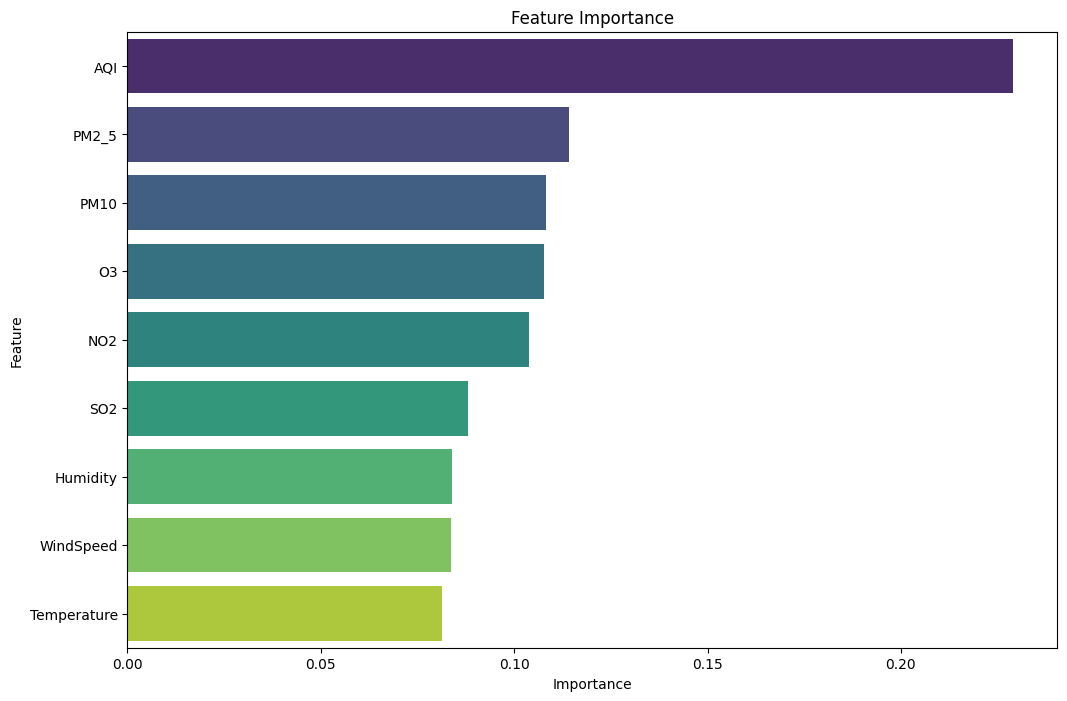

In [36]:
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Overall, the air quality indicators (AQI, PM2.5, PM10, O3, NO2) are the most critical features in predicting health impacts, with the AQI having the greatest influence. The meteorological features (Humidity, WindSpeed, Temperature) have lower importance but still contribute to the overall model performance.

## 6. Conclusion

The Random Forest model developed for predicting air quality's impact on human health has demonstrated strong performance across various metrics, with an accuracy of 86.67% and an F1 score of 87.04% on the test set. These results highlight the model's effectiveness in categorizing air quality into the five classes: 'very low', 'low', 'moderate', 'high', and 'very high'.

Key Insights:

High Accuracy and Balanced Metrics: The model shows high accuracy and balanced performance in terms of precision, recall, and F1 score, indicating that it effectively predicts health impact categories with minimal bias towards any specific class.

Impact of Class Imbalance: While the overall performance is robust, some misclassifications can be attributed to class imbalances. The model has struggled more with underrepresented classes, particularly with distinguishing between 'moderate' and 'very high' impact categories. This observation suggests that addressing class imbalances further could enhance the model's performance.

Feature Importance: The analysis of feature importance has revealed that AQI, PM2.5, and PM10 are the most influential factors in determining air quality impact. These features significantly contribute to the model's predictions, which aligns with their known roles in affecting human health.

In summary, the Random Forest model is a valuable tool for predicting the health impacts of air quality, with a strong performance overall. Addressing class imbalances and refining the model further could lead to even more accurate predictions and better insights into the effects of air quality on human health.

In [39]:
!gi

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Air-quality-health-prediction.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
